# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Ignacio

Apellidos: Núñez Gómez

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from dash import Dash, dcc, html
import plotly.express as px

# Análisis descriptivos


### Paso 0: Lectura del CSV

In [58]:
# Cargar el archivo CSV
file_path = "housing_time_series_by_madrid_neighbourhood.csv"
data = pd.read_csv(file_path)
print(data.head())
print(data.info())


  neighbourhood_group        date  m2_price  inflation  HICP  \
0              Centro  2010-08-01      15.3        0.3   1.6   
1              Centro  2011-01-01      15.6       -0.7   3.0   
2              Centro  2011-02-01      15.4        0.1   3.4   
3              Centro  2011-05-01      15.0        0.0   3.4   
4              Centro  2011-06-01      15.0       -0.1   3.0   

   population_density  listings_count  minimum_nights  nigth_price  \
0                 796               1             2.0   114.000000   
1                 800               1             2.0   114.000000   
2                 800               4             7.0   184.000000   
3                 800               5             9.6    61.000000   
4                 800               5             5.4   135.333333   

   availability_365  listing_reviews  number_of_reviews  reviews_per_month  \
0            305.00                1              155.0             0.9000   
1            305.00                1  

### Ejercicio 1: 6 gráficas de análisis descriptivo

Gráfica 1: Evolución del precio promedio del m^2 por barrio

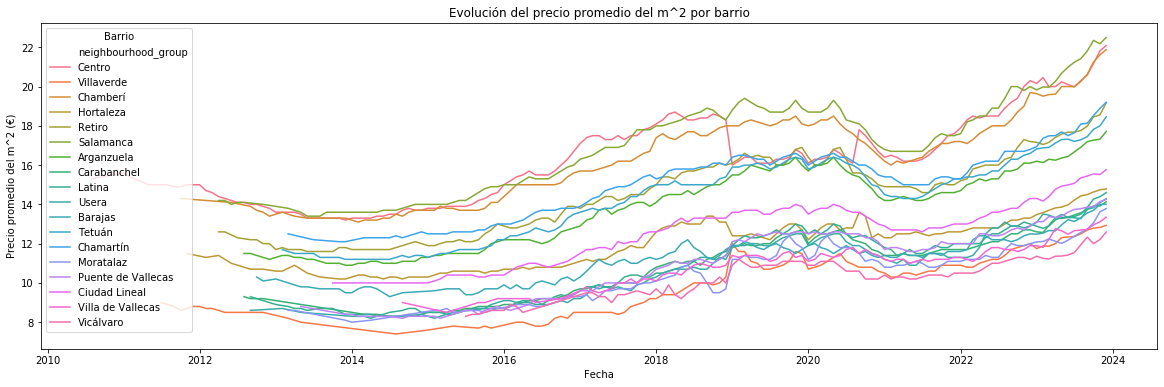

In [59]:
# Convertir date a formato datetime ---- me da error si no ?¿ - (volver aeste punto luego)
data['date'] = pd.to_datetime(data['date'])

# Calcular el precio promedio del m^2 por barrio y fecha
price_trend = data.groupby(['date', 'neighbourhood_group'])['m2_price'].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(20, 6))
sns.lineplot(data=price_trend, x='date', y='m2_price', hue='neighbourhood_group')
plt.title("Evolución del precio promedio del m^2 por barrio")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio del m^2 (€)")
plt.legend(title="Barrio")
plt.show()

Gráfica 2: Relación entre densidad de porblación y precio del metro cuadrado

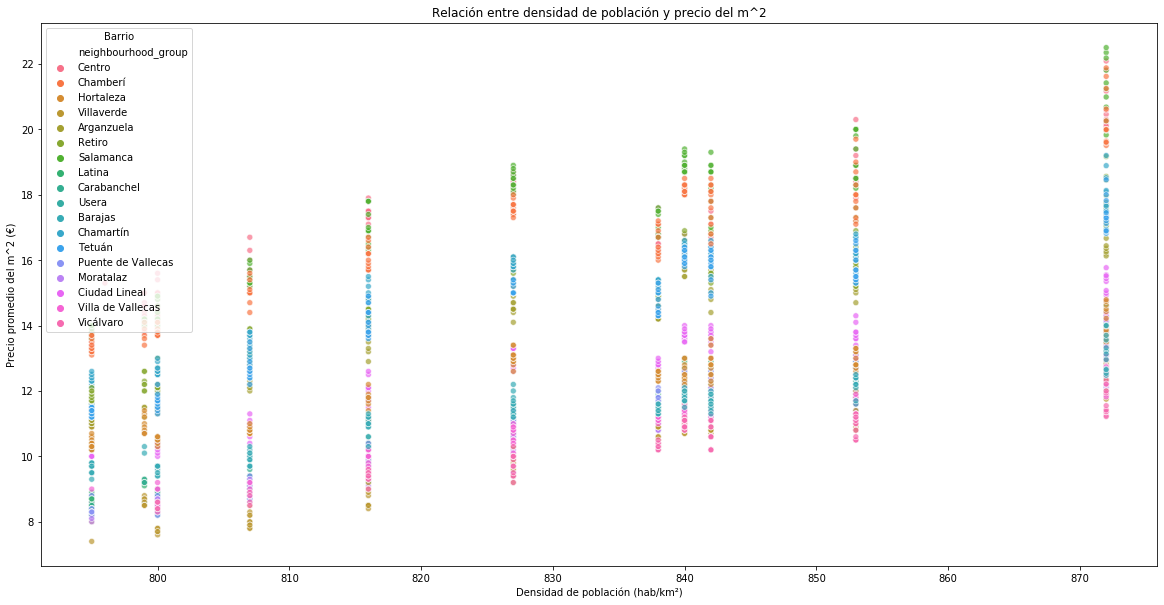

In [60]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data, x='population_density', y='m2_price', hue='neighbourhood_group', alpha=0.7)
plt.title("Relación entre densidad de población y precio del m^2")
plt.xlabel("Densidad de población (hab/km²)")
plt.ylabel("Precio promedio del m^2 (€)")
plt.legend(title="Barrio")
plt.show()

Gráfica 3: Patrones del número de reseñas por mes según la estación

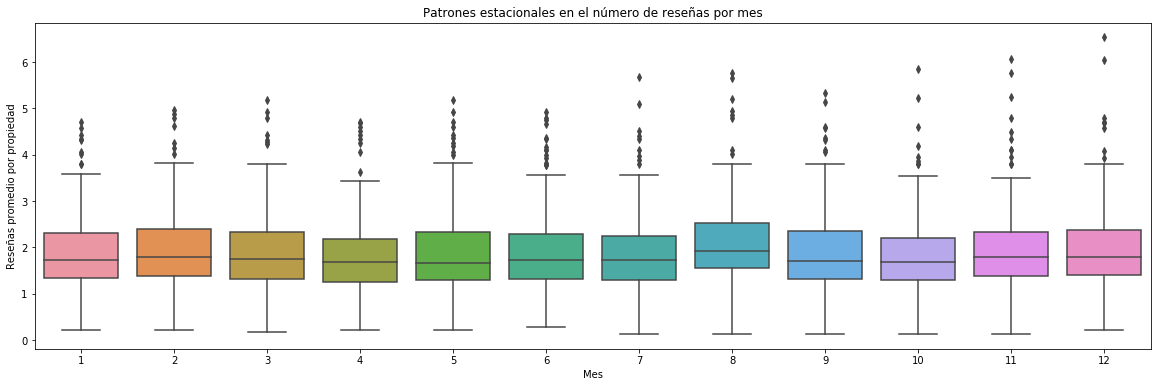

In [61]:
# Extraer el mes de la fecha
data['month'] = data['date'].dt.month

# Gráfico de cajas para revisar estacionalidad
plt.figure(figsize=(20, 6))
sns.boxplot(data=data, x='month', y='reviews_per_month')
plt.title("Patrones estacionales en el número de reseñas por mes")
plt.xlabel("Mes")
plt.ylabel("Reseñas promedio por propiedad")
plt.show()

Gráfica 4: Distribución de tipos de alojamiento por barrio

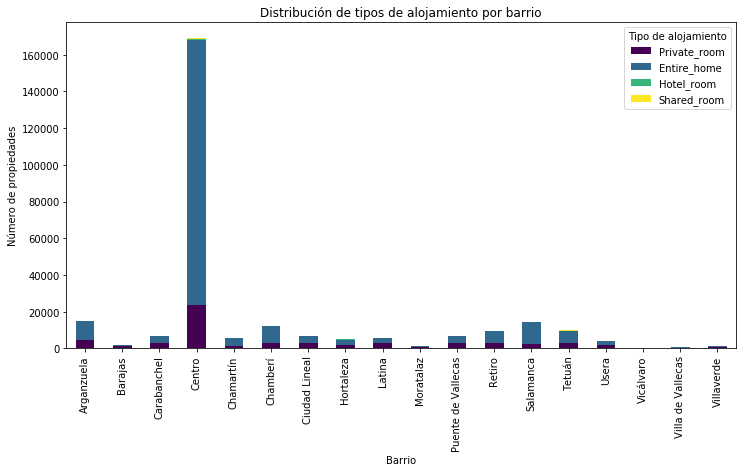

In [62]:
# Calcular la suma de propiedades por tipo y vecindario
property_types = data.groupby('neighbourhood_group')[['Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']].sum()
property_types.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribución de tipos de alojamiento por barrio")
plt.xlabel("Barrio")
plt.ylabel("Número de propiedades")
plt.legend(title="Tipo de alojamiento")
plt.show()

Gráfica 5: Número de anfitriones por barrio

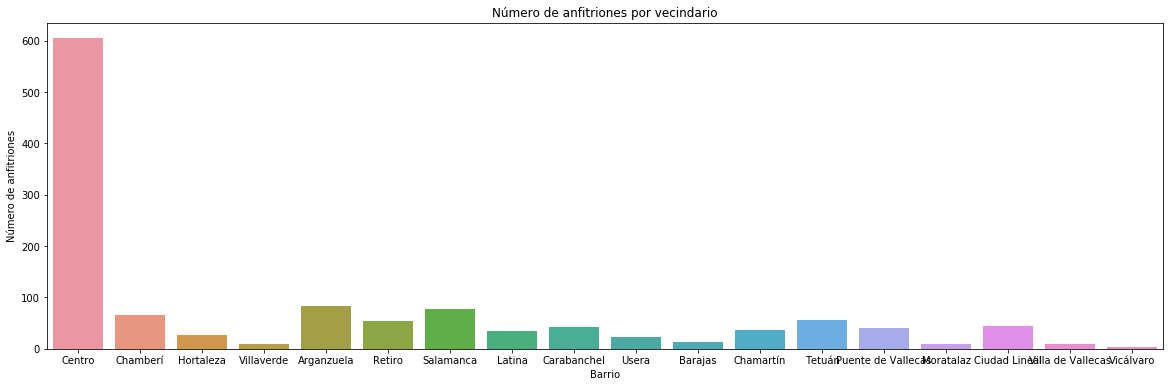

In [63]:
# Gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x='neighbourhood_group', y='hosts_count', ci=None)
plt.title("Número de anfitriones por vecindario")
plt.xlabel("Barrio")
plt.ylabel("Número de anfitriones")
plt.show()

Gráfico 6: Relación entre inflación y metro cuadrado


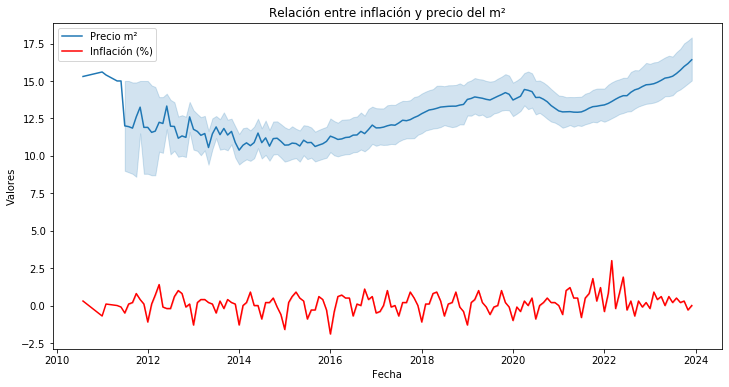

In [64]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='m2_price', label="Precio m²")
sns.lineplot(data=data, x='date', y='inflation', label="Inflación (%)", color="red")
plt.title("Relación entre inflación y precio del m²")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.show()

### Ejercicio 2: Modelo de regresión lineal

In [66]:
# Revisar tipos de datos
print(data.dtypes)

# Revisar si hay valores nulos
print(data.isnull().sum())

neighbourhood_group            object
date                   datetime64[ns]
m2_price                      float64
inflation                     float64
HICP                          float64
population_density              int64
listings_count                  int64
minimum_nights                float64
nigth_price                   float64
availability_365              float64
listing_reviews                 int64
number_of_reviews             float64
reviews_per_month             float64
hosts_count                     int64
Private_room                    int64
Entire_home                     int64
Hotel_room                      int64
Shared_room                     int64
month                           int64
dtype: object
neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_review

In [67]:
# Variables relacionadas con el alquiler vacacional
vacation_rental_vars = [
    'm2_price', 'listings_count', 'minimum_nights',
    'availability_365', 'listing_reviews', 'number_of_reviews',
    'reviews_per_month', 'hosts_count', 'Private_room', 
    'Entire_home', 'Hotel_room', 'Shared_room'
]

# Filtrar las columnas de interés
data = data[['date'] + vacation_rental_vars]

# Agregar los datos por fecha
aggregated_data = data.groupby('date').agg({
    'm2_price': 'mean',#Promedio
    'listings_count': 'sum',#Suma
    'minimum_nights': 'mean',    
    'availability_365': 'mean',   
    'listing_reviews': 'mean',    
    'number_of_reviews': 'sum',   
    'reviews_per_month': 'mean',  
    'hosts_count': 'sum',# Número anfitriones
    'Private_room': 'sum',        
    'Entire_home': 'sum',         
    'Hotel_room': 'sum',          
    'Shared_room': 'sum'          
}).reset_index()

In [68]:
# Definir variable objetivo y predictoras
y = aggregated_data['m2_price'] 
X = aggregated_data.drop(columns=['date', 'm2_price']) 
X = sm.add_constant(X)

c:\Users\ignac\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [69]:
# Ajustar el modelo
model = sm.OLS(y, X).fit()
# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               m2_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.96
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.39e-50
Time:                        16:49:34   Log-Likelihood:                -141.02
No. Observations:                 155   AIC:                             304.0
Df Residuals:                     144   BIC:                             337.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0731      0.38

### Ejercicio 3: Dashboard

Text(0, 0.5, 'Número de anfitriones')

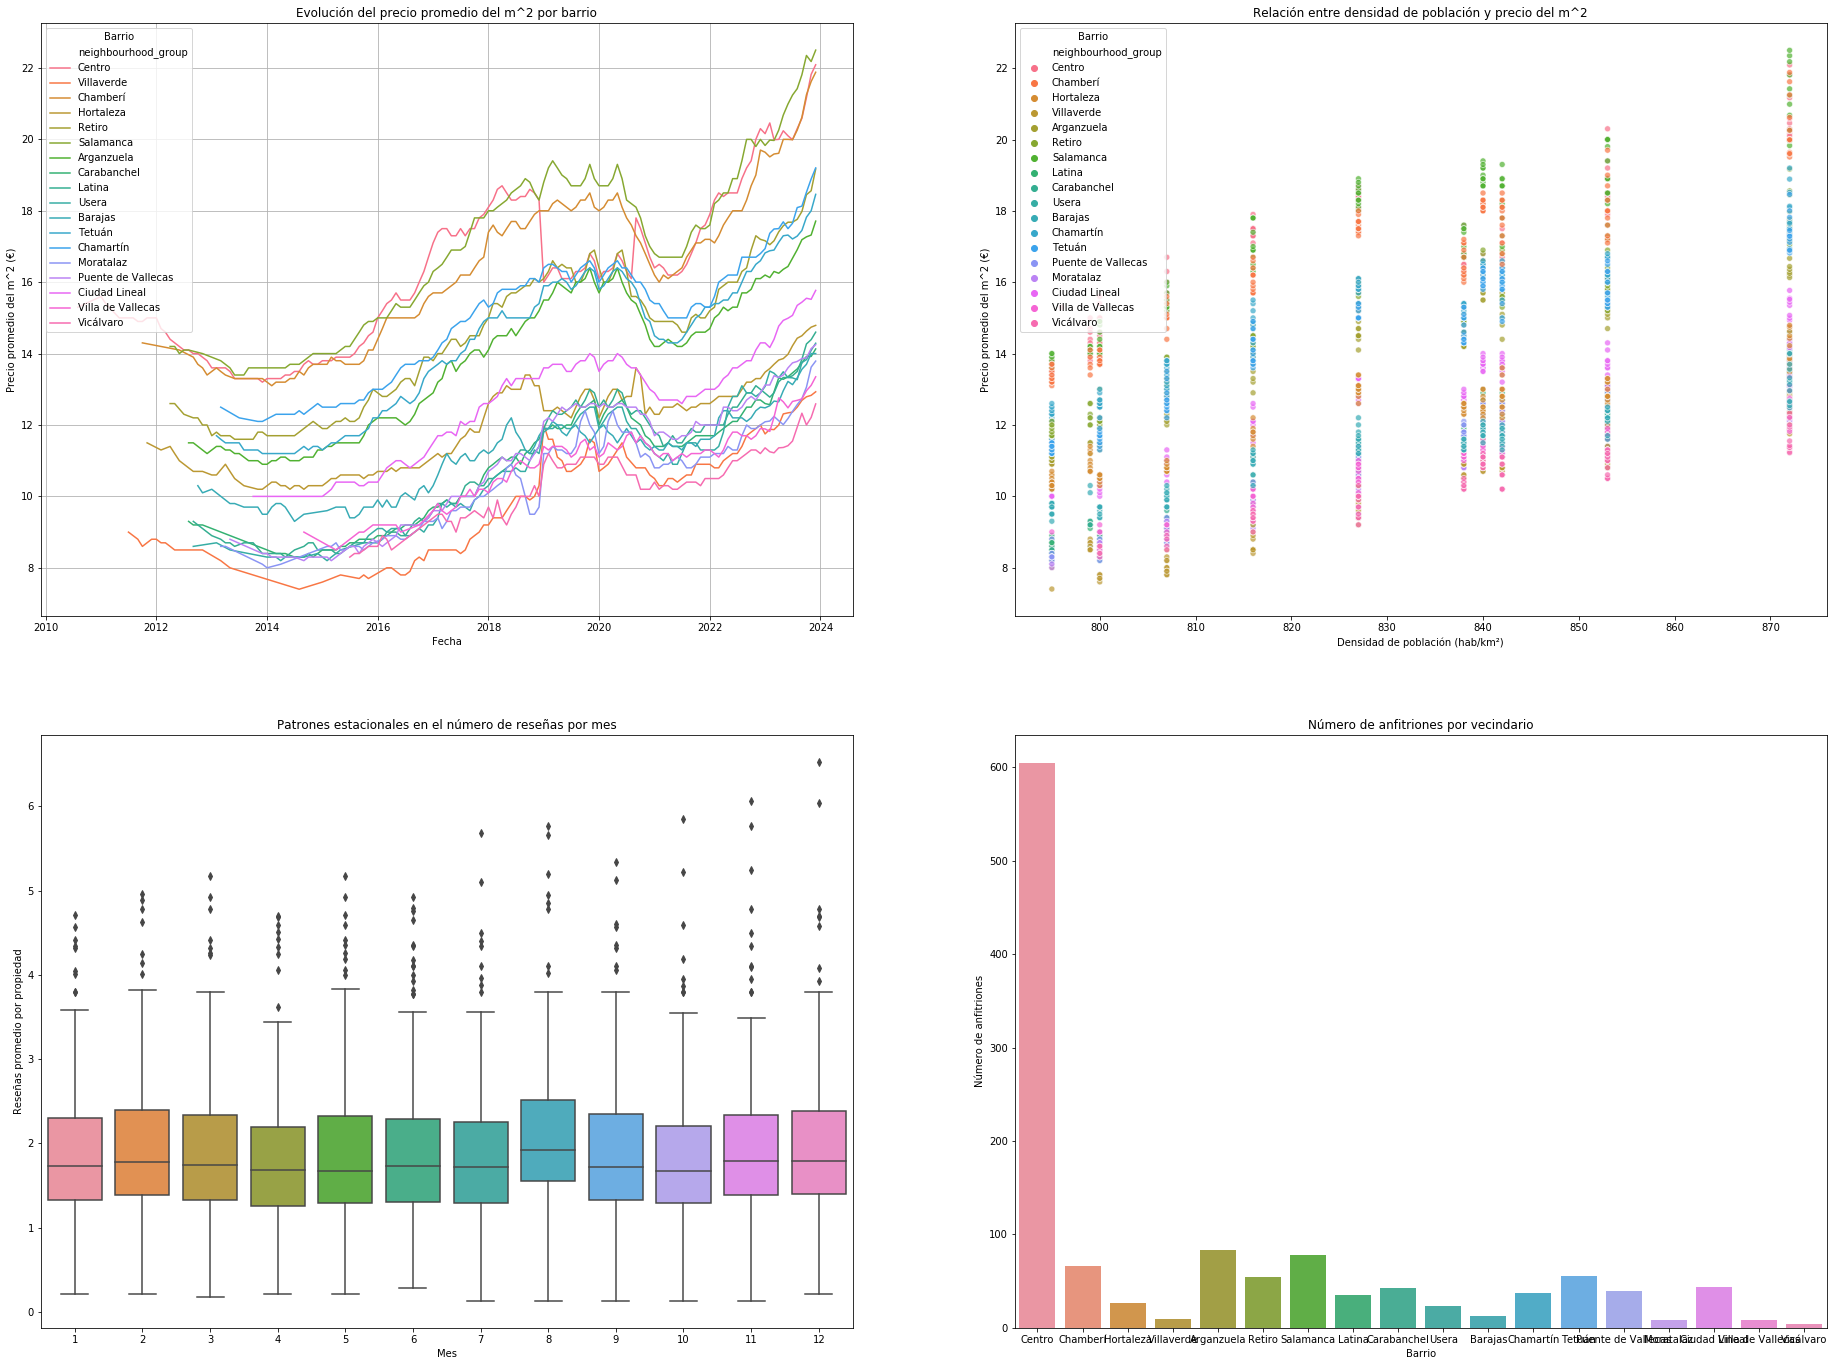

In [72]:
## dashboard con subplot
##recarga de datos:
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month


#####

plt.figure(figsize = (32,24))

# Primera figura (arriba izquierda)
plt.subplot(2,2,1) # Numero de filas, Numero de columnas, Numero de figura
sns.lineplot(data=price_trend, x='date', y='m2_price', hue='neighbourhood_group')
plt.title("Evolución del precio promedio del m^2 por barrio")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio del m^2 (€)")
plt.legend(title="Barrio")
plt.grid(True)

# segunda figura (arriba izquierda)
plt.subplot(2,2,2) # Numero de filas, Numero de columnas, Numero de figura
sns.scatterplot(data=data, x='population_density', y='m2_price', hue='neighbourhood_group', alpha=0.7)
plt.title("Relación entre densidad de población y precio del m^2")
plt.xlabel("Densidad de población (hab/km²)")
plt.ylabel("Precio promedio del m^2 (€)")
plt.legend(title="Barrio")


##tercera figura (medio izquierda)
plt.subplot(2,2,3) # Numero de filas, Numero de columnas, Numero de figura
sns.boxplot(data=data, x='month', y='reviews_per_month')
plt.title("Patrones estacionales en el número de reseñas por mes")
plt.xlabel("Mes")
plt.ylabel("Reseñas promedio por propiedad")

##cuarta figura (medio derecha)
plt.subplot(2,2,4) # Numero de filas, Numero de columnas, Numero de figura
sns.barplot(data=data, x='neighbourhood_group', y='hosts_count', ci=None)
plt.title("Número de anfitriones por vecindario")
plt.xlabel("Barrio")
plt.ylabel("Número de anfitriones")
